### Part B

##### Data Scraping Code

In [ ]:
import tweepy
import pandas as pd

In [ ]:
keyword = "fifa"
# Enter your Twitter API credentials
consumer_key = ""
consumer_secret = ""
access_token = ""
access_token_secret = ""

# Authenticate the API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Search for tweets with the keyword
tweets = tweepy.Cursor(api.search, q=keyword, count=100, lang='en', tweet_mode = 'extended', start_time=start_time).items(5000)

In [ ]:
tweets_list = [[tweet.full_text, tweet.user, tweet.retweet_count] for tweet in tweets]

In [ ]:
scraped_data_df = pd.DataFrame()
copy_df = pd.DataFrame()

In [ ]:
for tweet in tweets_list:

    dict1=tweet[1]._json
    rtw={'Tweet': tweet[0],'Retweet_count': tweet[2] }
    merged_dict={**dict1,**rtw}
    scraped_data_df = scraped_data_df.append(merged_dict, ignore_index = True)
    temp_df = {'Tweeter': '@'+tweet[1].screen_name, 'Tweet': tweet[0]}
    copy_df = copy_df.append(temp_df, ignore_index = True)

copy_df.to_csv('graph_df.csv')
scraped_data_df.to_csv('scraped_data_df.csv')

In [ ]:
entire_data_df = pd.read_csv('entire_data_df.csv')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import networkx as nx

In [58]:
df1 = pd.read_csv('df_for_graph.csv', index_col = [0])

In [59]:
df1.head()

,Tweeter,Tweet
0,@westbrookjr1999,RT @FOXSoccer: The game you’ve been waiting fo...
1,@_soyelnegro,RT @FabrizioRomano: Barça director Alemany con...
2,@18Antonio24,RT @FOXSoccer: The game you’ve been waiting fo...
3,@KELV_SZN,RT @FabrizioRomano: Barça director Alemany con...
4,@ObaTeecube,RT @FabrizioRomano: Barça director Alemany con...


In [60]:
def find_retweet(s):
    retweet = re.findall('RT \@[^\s\:]+',s)
    
    try:
        retweet = retweet[0][4:]
    except IndexError:
        retweet = None
    return retweet

In [61]:
df1['ReTweeter'] = df1['Tweet'].apply(find_retweet)
df1.head() # where new is None that is OG not retweet

,Tweeter,Tweet,ReTweeter
0,@westbrookjr1999,RT @FOXSoccer: The game you’ve been waiting fo...,FOXSoccer
1,@_soyelnegro,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano
2,@18Antonio24,RT @FOXSoccer: The game you’ve been waiting fo...,FOXSoccer
3,@KELV_SZN,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano
4,@ObaTeecube,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano


In [62]:
def remove(s):
    return s[1:]

df1['Tweeter'] = df1['Tweeter'].apply(remove)
df1.head()

,Tweeter,Tweet,ReTweeter
0,westbrookjr1999,RT @FOXSoccer: The game you’ve been waiting fo...,FOXSoccer
1,_soyelnegro,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano
2,18Antonio24,RT @FOXSoccer: The game you’ve been waiting fo...,FOXSoccer
3,KELV_SZN,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano
4,ObaTeecube,RT @FabrizioRomano: Barça director Alemany con...,FabrizioRomano


In [63]:
arr = []
for elem in df1['ReTweeter']:
    if elem == None:
        arr.append('Tweet')
    else:
        arr.append('Retweet')
        
df1['Type'] = arr
df2 = df1[['Tweeter', 'ReTweeter', 'Type']]

In [64]:
df2.head(10)

,Tweeter,ReTweeter,Type
0,westbrookjr1999,FOXSoccer,Retweet
1,_soyelnegro,FabrizioRomano,Retweet
2,18Antonio24,FOXSoccer,Retweet
3,KELV_SZN,FabrizioRomano,Retweet
4,ObaTeecube,FabrizioRomano,Retweet
5,EllaMarie_94,None,Tweet
6,KarlDafyddCFC,FabrizioRomano,Retweet
7,El1teMk,HoratioFTA,Retweet
8,IdrisMawis,FabrizioRomano,Retweet
9,Cesarcz99,Plute93,Retweet


In [65]:
import copy
df3 = df2.copy()
df3.loc[df3['ReTweeter'].isnull(), 'ReTweeter'] = df3['Tweeter']

# with None networkx gives value error

In [66]:
df3.head(10)

,Tweeter,ReTweeter,Type
0,westbrookjr1999,FOXSoccer,Retweet
1,_soyelnegro,FabrizioRomano,Retweet
2,18Antonio24,FOXSoccer,Retweet
3,KELV_SZN,FabrizioRomano,Retweet
4,ObaTeecube,FabrizioRomano,Retweet
5,EllaMarie_94,EllaMarie_94,Tweet
6,KarlDafyddCFC,FabrizioRomano,Retweet
7,El1teMk,HoratioFTA,Retweet
8,IdrisMawis,FabrizioRomano,Retweet
9,Cesarcz99,Plute93,Retweet


In [67]:
df3['nodes'] = df3[['Tweeter', 'ReTweeter']].apply(tuple, axis=1)

g = nx.DiGraph()  
g.add_edges_from(df3['nodes'])

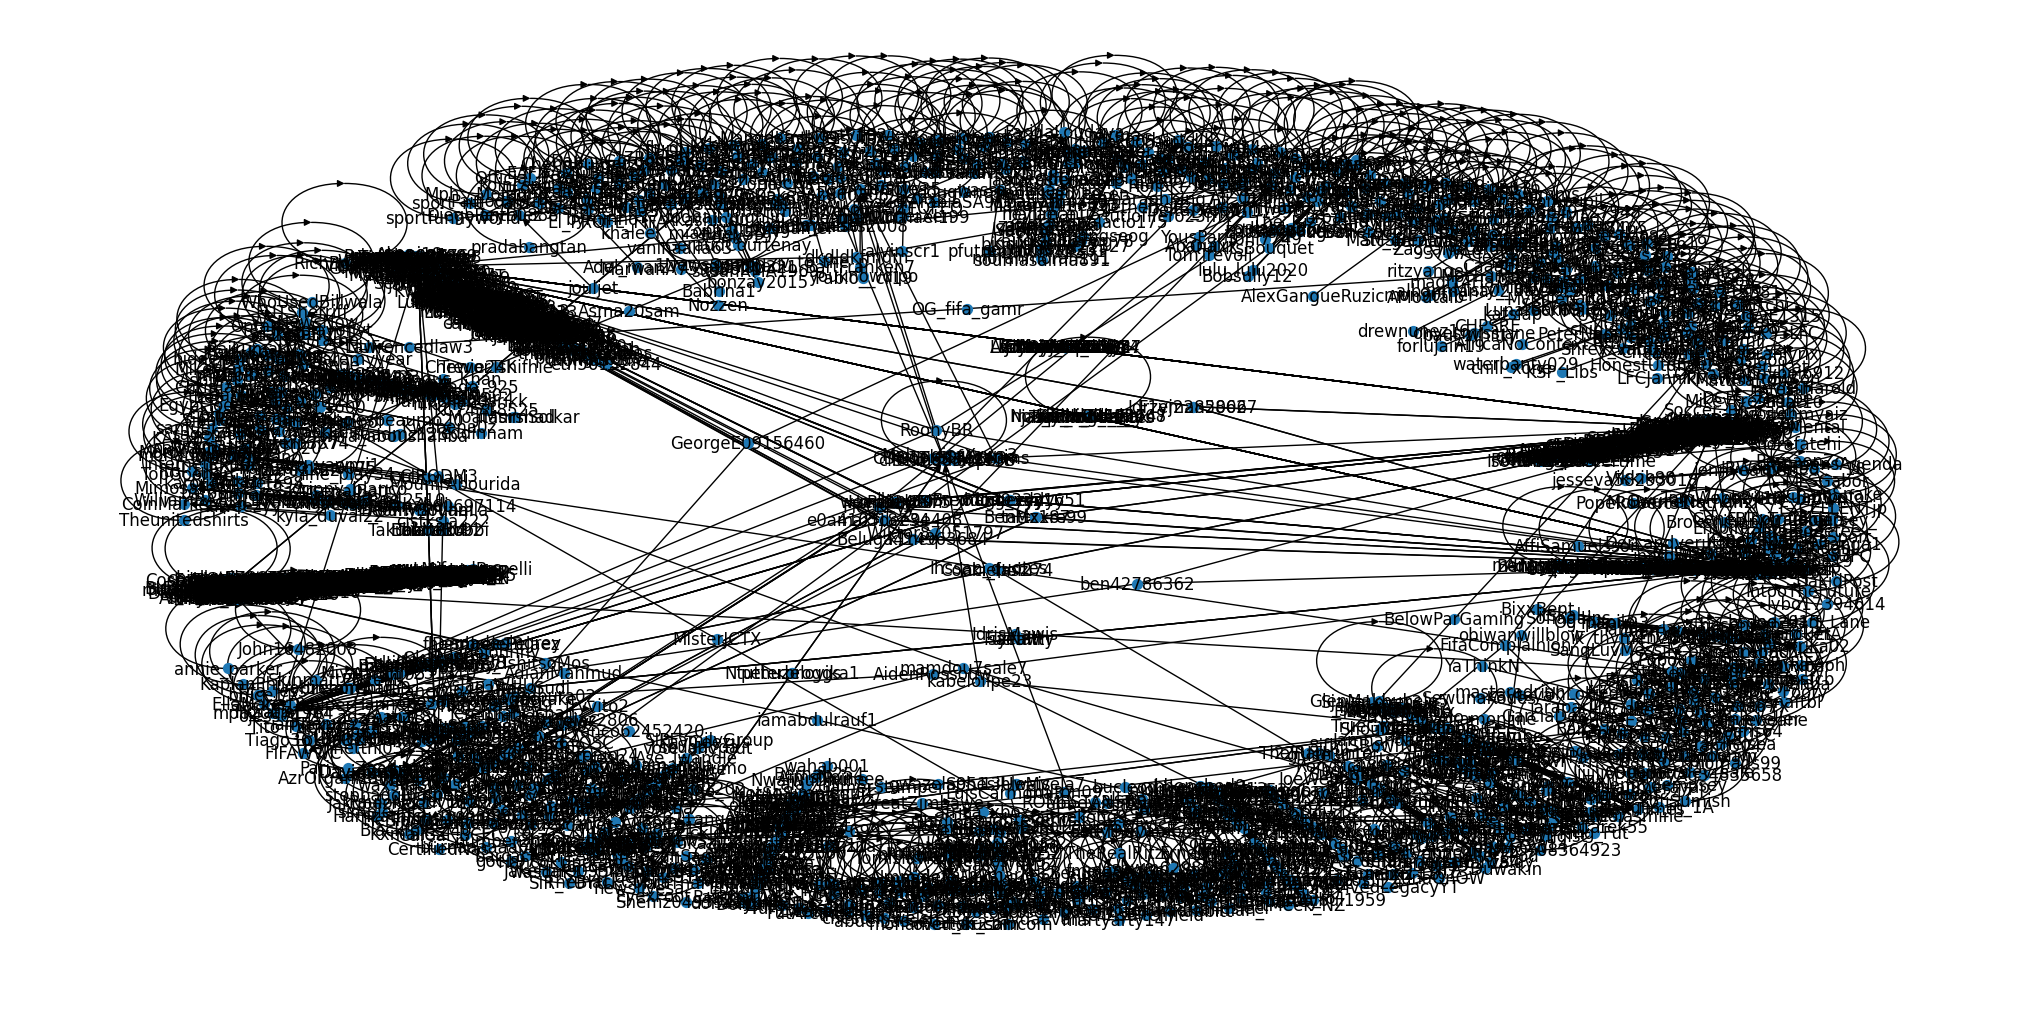

In [68]:
plt.figure(figsize = (20, 10))

nx.draw(g, with_labels = True, node_size = 50, font_size = 12)  
plt.show()

In [69]:
degree = nx.degree_centrality(g)
between = nx.betweenness_centrality(g)
close = nx.closeness_centrality(g)

# these will be dictionaries

In [70]:
metrics_df = pd.DataFrame([degree, between,close]).T
metrics_df.reset_index(inplace = True)
metrics_df.columns = ['username','degree','between','close']
metrics_df.head()

,username,degree,between,close
0,westbrookjr1999,0.000525,0.0,0.000000
1,FOXSoccer,0.005255,0.0,0.004204
2,_soyelnegro,0.000525,0.0,0.000000
3,FabrizioRomano,0.152916,0.0,0.151865
4,18Antonio24,0.000525,0.0,0.000000


In [71]:
# users_data_df = users_data_df.merge(metrics_df,how = 'inner', on = 'username')

In [72]:
df = pd.read_csv('entire_data_df.csv')
df.columns

Index(['Unnamed: 0', 'id', 'id_str', 'name', 'screen_name', 'location',
       'description', 'url', 'entities', 'protected', 'followers_count',
       'friends_count', 'listed_count', 'created_at', 'favourites_count',
       'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count',
       'lang', 'contributors_enabled', 'is_translator',
       'is_translation_enabled', 'profile_background_color',
       'profile_background_image_url', 'profile_background_image_url_https',
       'profile_background_tile', 'profile_image_url',
       'profile_image_url_https', 'profile_banner_url', 'profile_link_color',
       'profile_sidebar_border_color', 'profile_sidebar_fill_color',
       'profile_text_color', 'profile_use_background_image',
       'has_extended_profile', 'default_profile', 'default_profile_image',
       'following', 'follow_request_sent', 'notifications', 'translator_type',
       'withheld_in_countries', 'Tweet', 'Retweet_count'],
      dtype='object')

In [73]:
user_a_retweets_tweets = pd.pivot_table(df3[['Tweeter', 'ReTweeter', 'Type']], 
                                        index = 'Tweeter', 
                                        columns = 'Type', 
                                        aggfunc = "count", 
                                        fill_value = 0).reset_index()

user_a_retweets_tweets.columns = user_a_retweets_tweets.columns.get_level_values(0)
user_a_retweets_tweets.columns = ['username', 'retweets_sent','tweet_count']
user_a_retweets_tweets.iloc[0]

username         0418Aipanman
retweets_sent               1
tweet_count                 0
Name: 0, dtype: object

In [74]:
user_a_retweets_tweets.head()

,username,retweets_sent,tweet_count
0,0418Aipanman,1,0
1,04Legit,1,0
2,07Blizz11,1,0
3,0_latiesha,1,0
4,10_manka,1,0


In [75]:
user_b_retweets_rec = pd.pivot_table(df3[['Tweeter', 'ReTweeter', 'Type']], index = 'ReTweeter', columns = 'Type', 
                                     aggfunc = "count", fill_value = 0).reset_index()

user_b_retweets_rec.columns = user_b_retweets_rec.columns.get_level_values(0)
user_b_retweets_rec.columns = ['username', 'retweets_rec','tweet_count']

user_b_retweets_rec.drop('tweet_count', inplace = True, axis = 1)

# merge the two for the final results
retweets_df = user_a_retweets_tweets.merge(user_b_retweets_rec, how = 'outer', on='username').fillna(0)

In [76]:
retweets_df.head()

,username,retweets_sent,tweet_count,retweets_rec
0,0418Aipanman,1.0,0.0,0.0
1,04Legit,1.0,0.0,0.0
2,07Blizz11,1.0,0.0,0.0
3,0_latiesha,1.0,0.0,0.0
4,10_manka,1.0,0.0,0.0


In [77]:
final_df = df[['screen_name', 'listed_count', 'followers_count'
                                     ]].drop_duplicates().merge(retweets_df, how = 'left', 
                                                        left_on = 'screen_name', right_on = 'username')

final_df.head()

,screen_name,listed_count,followers_count,username,retweets_sent,tweet_count,retweets_rec
0,westbrookjr1999,0.0,76.0,westbrookjr1999,1.0,0.0,0.0
1,_soyelnegro,25.0,811.0,_soyelnegro,1.0,0.0,0.0
2,18Antonio24,0.0,279.0,18Antonio24,1.0,0.0,0.0
3,KELV_SZN,5.0,621.0,KELV_SZN,1.0,0.0,0.0
4,ObaTeecube,0.0,404.0,ObaTeecube,1.0,0.0,0.0


In [78]:
final_df = final_df.drop(['username'], axis=1)

for i in final_df.iloc[:, 1:]:
  
    mean = final_df[i].mean()
    std = final_df[i].std()
    
    final_df[i] -= mean
    final_df[i] /= std

In [79]:
final_df

,screen_name,listed_count,followers_count,retweets_sent,tweet_count,retweets_rec
0,westbrookjr1999,-0.083735,-0.051848,0.291367,-0.554727,-0.043069
1,_soyelnegro,-0.038238,-0.049801,0.291367,-0.554727,-0.043069
2,18Antonio24,-0.083735,-0.051283,0.291367,-0.554727,-0.043069
3,KELV_SZN,-0.074636,-0.050330,0.291367,-0.554727,-0.043069
4,ObaTeecube,-0.083735,-0.050934,0.291367,-0.554727,-0.043069
...,...,...,...,...,...,...
1785,AccraChelsea,-0.080096,-0.048672,-1.303580,1.284090,-0.043069
1786,TGOD_EZMID,-0.080096,-0.052026,0.291367,-0.554727,-0.043069
1787,byrninho,-0.083735,-0.050826,-1.303580,1.284090,-0.043069
1788,AnasAitElHadj1,-0.083735,-0.052051,1.886314,-0.554727,-0.043069


In [80]:
final_df.drop_duplicates(inplace=True)

# merge network stats with twitter stats
final_df2 = metrics_df.merge(final_df, right_on = "screen_name", left_on = "username")

final_df2.iloc[0]

username           westbrookjr1999
degree                    0.000525
between                        0.0
close                          0.0
screen_name        westbrookjr1999
listed_count             -0.083735
followers_count          -0.051848
retweets_sent             0.291367
tweet_count              -0.554727
retweets_rec             -0.043069
Name: 0, dtype: object

In [89]:
a, b, c, d, e, f, g, h = 1, 1, 1, importance_df.loc['listed_count_diff'].values[0], importance_df.loc['follower_count_diff'].values[0]\
, importance_df.loc['retweets_sent_diff'].values[0], importance_df.loc['posts_diff'].values[0], importance_df.loc['retweets_received_diff'].values[0]
# need to put coefficients from log reg here

final_df2['score'] = final_df2['degree']*a \
                    + final_df2['between']*b\
                    + final_df2['close']*c\
                    + final_df2['listed_count']*d\
                    + final_df2['followers_count']*e\
                    + final_df2['retweets_sent']*f\
                    + final_df2['tweet_count']*g\
                    + final_df2['retweets_rec']*h

In [94]:
final_df2.sort_values(by='score', ascending=False).rename(columns = {'between': "betweeness",
                                                                     'close': 'closeness'}).head(20)

,username,degree,betweeness,closeness,screen_name,listed_count,followers_count,retweets_sent,tweet_count,retweets_rec,score
3,FabrizioRomano,0.152916,0.000000e+00,0.151865,FabrizioRomano,32.324887,38.567534,-1.303580,1.284090,41.293203,85.206822
1096,TUDNMEX,0.001576,0.000000e+00,0.000525,TUDNMEX,18.087878,13.300425,-1.303580,1.284090,0.099963,27.847822
1,FOXSoccer,0.005255,0.000000e+00,0.004204,FOXSoccer,12.287885,4.092188,-1.303580,1.284090,1.101187,15.392566
63,GuardianNigeria,0.001051,0.000000e+00,0.000000,GuardianNigeria,3.767154,7.261046,-1.303580,1.284090,-0.043069,9.347877
1095,Zona_TUDN,0.000525,0.000000e+00,0.000000,Zona_TUDN,5.563387,4.312813,0.291367,-0.554727,-0.043069,8.758315
916,MiddleEastEye,0.002627,0.000000e+00,0.001576,MiddleEastEye,8.096676,0.939404,-1.303580,1.284090,0.386027,8.460001
560,usatodaysports,0.001051,0.000000e+00,0.000000,usatodaysports,8.052998,0.679198,-1.303580,1.284090,-0.043069,7.963267
536,robertmarawa,0.000525,0.000000e+00,0.000000,robertmarawa,2.311241,3.847165,0.291367,-0.554727,-0.043069,5.320127
483,ahramonline,0.000525,0.000000e+00,0.000000,ahramonline,4.234866,0.453032,0.291367,-0.554727,-0.043069,4.336944
472,Zeinobia,0.000525,0.000000e+00,0.000000,Zeinobia,3.519649,0.742964,0.291367,-0.554727,-0.043069,3.903364


### Conclusion

In the table above, we have listed the top 20 influencers for FIFA on the basis of the computed score. We have used the coefficients from our best model in Part 1 - Logistic regression to assign weights to the most important features we get for getting the final score.

Interpreting the results: The analysis classifies Fabrizio Romano as the top influencer and he is assigned a score which is almost three times greater than the influencer holding the second rank. He also has a very high degree centrality, which reveals he is very well connected in the network. This is because Fabrizio Romano is an extremely well-renowned Italian football journalist and is highly regarded as one of the most well-informed sources of football worldwide. With 13.9M followers, he has a very active presence on Twitter, so it is not surprising that he established a high degree of influence during FIFA. TUDNMEX and FoxSoccer rank second and third in the list. Both are extremely popular channels(the former being an online Mexican channel) for soccer.

We also see that the top 3 influencers have a significantly higher influencer score as compared to the rest of the influencers in the list. This list for the top 20 influencers is dominated by many influential individuals interspersed with some online and TV channels.